In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

with open('data.pickle', 'rb') as handle:
    mnist_dict = pickle.load(handle)

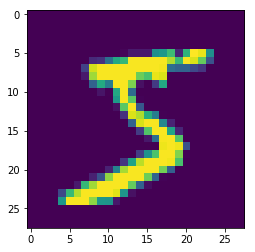

In [4]:
plt.imshow(mnist_dict['train/images'][0])

### LeNet 300-100 Architecture

1. 784 + bias (input) * 300 - ReLU 
2. 300 + bias (hidden) * 100 - ReLU
3. 100 + bias (hidden) * 10 - Sigmoid
4. 10

### Forward Prop

### Backward Prop

## Activations

ReLU$(x) = x$ if $x>=0, 0$ if $x<0$

$d$ReLU$(x) = 1$ if $x>=0, 0$ if $x<0$

$\sigma(x) = \frac{1}{1 + \exp(-x)}$

$\frac{d}{dx}\sigma(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} 
= \sigma(x)\frac{-1 +1 +\exp(-x)}{1 + \exp(-x)}
= \sigma(x)(\frac{1 +\exp(-x)}{1 + \exp(-x)} - \frac{1}{1 + \exp(-x)})
= \sigma(x)(1-\sigma(x))$



In [64]:
def ReLU(M):
    return np.maximum(0, M)

def dReLU(M):
    M[M>=0] = 1
    M[M<0] = 0
    return M

def Sigmoid(M):
    return 1 / (1 + np.exp(-M))

def dSigmoid(M):
    s = Sigmoid(M)
    return (s * (1-s))

def Softmax(M):
    M = np.exp(M - np.max(M))#max ensures no over/underflow errors
    return M/sum(M)

assert(np.all(ReLU(np.array([-1,0,1,1])) == np.array([0, 0, 1, 1])))
assert(np.all(dReLU(np.array([-1,0,1,1])) == np.array([0, 1, 1, 1])))
assert(np.all(Sigmoid(np.array([np.exp(10),0])) == np.array([1,0.5])))
assert(np.all(dSigmoid(np.array([np.exp(10),0])) == np.array([0,0.25])))
assert(np.all(Softmax(np.array([-10000,10000])) == np.array([0,1])))

In [55]:
class mlp:
    def __init__(self):
        self.layer1 = np.random.rand(785,50)
        self.layer2 = np.random.rand(51,10)
        self.layer1 = (self.layer1 - np.mean(self.layer1) ) / np.std(self.layer1)
        self.layer2 = (self.layer2 - np.mean(self.layer2) ) / np.std(self.layer2)
        
    def forward(self, image):
        out = np.append(image.reshape(784), np.array([1]))
        out = out.dot(self.layer1)
        out = ReLU(out)
        out = np.append(out, np.array([1]))
        out = out.dot(self.layer2)
        out = Softmax(out)
        return out

In [56]:
mlp_classifier = mlp()
mlp_classifier.forward(mnist_dict['train/images'][0])

[  4388.0473191    1818.32118193  11724.46005366  11253.07123613
 -25533.14947402   2161.73371462  -6561.82600306 -12987.51762238
   3151.45744364   8643.76980297]


array([0.00000000e+000, 0.00000000e+000, 1.00000000e+000, 1.89861854e-205,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000])

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [25]:
mnist_dict['train/images'][0].reshape(784)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17